<a href="https://colab.research.google.com/github/armiro/canine-disease-diagnosis/blob/main/model_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
path = "/content/normalized_dataset.csv"
dataset = pd.read_csv(path)

features = dataset.iloc[:, :30].values
labels = dataset.iloc[:, 30:].values

In [3]:
onehot_encoder_1 = OneHotEncoder(categories='auto', drop='first', sparse=False)
encoded_mat_1 = onehot_encoder_1.fit_transform(X=features[:, 0].reshape(-1, 1))

onehot_encoder_2 = OneHotEncoder(categories='auto', drop='first', sparse=False)
encoded_mat_2 = onehot_encoder_2.fit_transform(X=features[:, 2].reshape(-1, 1))

features = np.concatenate((encoded_mat_1, features[:, 1].reshape(-1, 1), 
                               encoded_mat_2, features[:, 3:]), axis=1)

In [50]:
features[:, 7] = features[:, 7] / np.max(features[:, 7])

# split the dataset into training-set and test-set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=17)

In [66]:
from sklearn.neural_network import MLPClassifier


classifier = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',
                           max_iter=2000, verbose=2)

In [ ]:
classifier.fit(X=X_train, y=y_train)

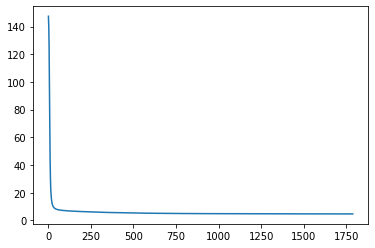

In [69]:
plt.plot(classifier.loss_curve_)
plt.show()

In [90]:
idx = np.random.randint(0, len(X_train))
print(idx)
print(classifier.predict(X=np.expand_dims(X_train[idx], axis=0)))
print(y_train[idx])

1380
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
